# K-nearest neighbors na Regressão
   Assim como antes nos problemas de classificação podemos utilizar a distância euclidiana para calcular a distância entre as instâncias porem a diferença reside na forma em que será calculado o valor para se associar a instância que está sendo testada.
   Invés de usarmos aquela classe que aparece com mais frequência(classe dominante) no vetor dos vizinhos mais próximos, pegaremos uma média dos valores dessas instâncias. A saída é um valor numérico. Este valor será uma medida de posição dos valores dos seus vizinhos mais próximos, por exemplo a média ou mediana.

In [47]:
import pandas as pd
dataset_train = pd.read_csv('../../data/blogData_train.csv', header=None) # Importing train dataframe
dataset_test = pd.read_csv('../../data/modified/blogData_test.csv', header=None) # Importing test dataframe

In [48]:
# selects test data
x_test = dataset_test.iloc[:, 0:-1] # all coluns
y_test = dataset_test.iloc[:,-1] # last column of data frame 

#selects train data
x_train = dataset_train.iloc[:,0:-1] # all coluns
y_train = dataset_train.iloc[:,-1] # last column of data frame 

In [49]:
print("Train: % " + str(len(x_train)/(len(x_train) + len(x_test)))) # % of train
print("Test: % " + str(len(x_test)/(len(x_train) + len(x_test)))) # % of teste

Train: % 0.8729777911064461
Test: % 0.12702220889355392


## Definindo o melhor K para o KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import time

init = time.time() # initial time point

# Search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, x_test, y_test, cv=10, scoring='r2')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print('Execution time: {} seconds'.format(str(time.time() - init)))
print('K Scores List' + str(k_scores))

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Execution time: 89.41406011581421 seconds
K Scores List[0.24772838361792235, 0.3169536632390913, 0.31236447388249583, 0.328460280574606, 0.35171606681546824, 0.3657483642838863, 0.3581321298084891, 0.3472954656492514, 0.34916979783582397, 0.3610259563112822, 0.3573653840408495, 0.3580850915461761, 0.35788570982368606, 0.3572662832298084, 0.3562581951375207, 0.3559331458937837, 0.3499418614696508, 0.34367083743013216, 0.33796047336786933, 0.3345589873444756, 0.3322238886309794, 0.33018262810557386, 0.32783907801759093, 0.32862494980254225, 0.3289369119399378, 0.32368253225727683, 0.32147783862192497, 0.3205077582728157, 0.3150497749010518, 0.31021377907419556]
Length of list 30
Max of list 0.3657483642838863


In [51]:
from sklearn.metrics import mean_absolute_error
import time

init = time.time() # Initial point of time

neigh = KNeighborsRegressor(n_neighbors=9) 
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 12.29654860496521 seconds
R2 score: 0.35118008800150924
[0.43473518 0.33559719 0.34675272]
MAE: 5.695508336248105


## K Fold

In [52]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k) # Fit and predic
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[ 0.49326512 -0.11497117  0.70228984  0.38513362  0.44769003  0.17587536
  0.30904336  0.28901337  0.37260794  0.43175051]
Mean : 0.34916979783582397


## Predições em relação ao resultado original

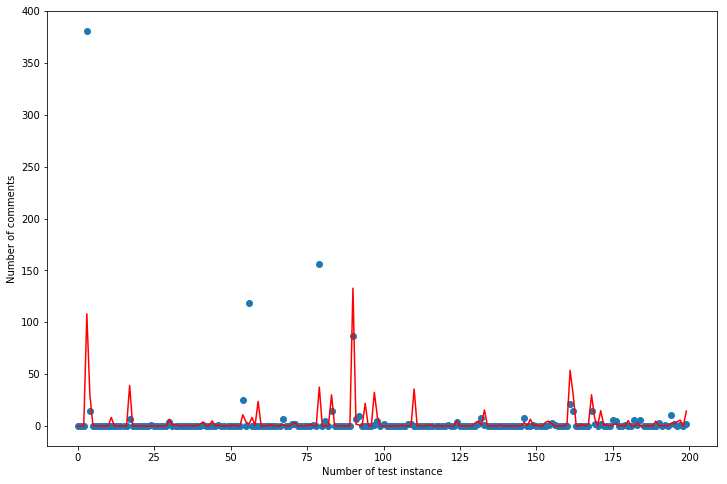

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200]) # Set only 200 data
plt.plot(x, y_pred[:200], color='red') 
plt.show()